In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


import sys
!{sys.executable} -m pip install xgboost

from xgboost import XGBRegressor



from sklearn.model_selection import learning_curve

In [2]:
df_meli_2=pd.read_csv("Data/dfInmuebles_meli.csv")

/Users/juanmartingarcia/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (37,38,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_meli_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22508 entries, 0 to 22507
Data columns (total 51 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   title                                                              22508 non-null  object 
 1   condition                                                          18508 non-null  object 
 2   listing_type_id                                                    10508 non-null  object 
 3   category_id                                                        22508 non-null  object 
 4   domain_id                                                          22508 non-null  object 
 5   currency_id                                                        22508 non-null  object 
 6   order_backend                                                      22508 non-null  int64  
 7   price                 

In [4]:
# check for duplicate rows
duplicate_rows = df_meli_2.duplicated()
if duplicate_rows.any():
    print("There are duplicate rows in the dataframe")
else:
    print("There are no duplicate rows in the dataframe")


There are no duplicate rows in the dataframe


In [5]:
# check for duplicate column values
duplicate_cols = df_meli_2.duplicated(keep=False)
if duplicate_cols.any():
    print("There are duplicate column values in the dataframe")
else:
    print("There are no duplicate column values in the dataframe")

There are no duplicate column values in the dataframe


Inspect the data: Start by loading your data into a Pandas dataframe and use head(), info(), describe(), and shape methods to get an overview of the data.

In [6]:
df_meli_2.head(5)

,title,condition,listing_type_id,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,...,seller_contact__contact,seller_contact__other_info,days_remaining,years_active,thumbnail_id,available_quantity,seller__seller_reputation__metrics__claims__rate,seller_contact__webpage,official_store_name,seller__home_image_url
0,Monoambiente Alquiler Temporario Salta Capital,used,gold_premium,MLA50279,MLA-APARTMENTS_FOR_VACATION_RENTAL,ARS,1,7000.0,"['good_quality_picture', 'good_quality_thumbna...",716466828,...,NaN,NaN,43,2,NaN,NaN,NaN,NaN,NaN,NaN
1,Vacaciones En Salta La Linda !!!!!,used,gold_premium,MLA50279,MLA-APARTMENTS_FOR_VACATION_RENTAL,ARS,2,6300.0,"['dragged_visits', 'free_relist', 'good_qualit...",15906301,...,NaN,NaN,85,20,NaN,NaN,NaN,NaN,NaN,NaN
2,Departamento Céntrico 2 Ambientes,used,gold_premium,MLA50279,MLA-APARTMENTS_FOR_VACATION_RENTAL,ARS,3,8000.0,"['good_quality_picture', 'good_quality_thumbna...",716466828,...,NaN,NaN,40,2,NaN,NaN,NaN,NaN,NaN,NaN
3,"Casa Equipada, Lugar Estratégico Y Tranquilo Y...",used,gold_premium,MLA50278,MLA-HOUSES_FOR_VACATION_RENTAL,ARS,4,7750.0,"['dragged_visits', 'good_quality_picture']",61838570,...,NaN,NaN,47,18,NaN,NaN,NaN,NaN,NaN,NaN
4,Casa - Villa Jardin De Reyes,used,gold_premium,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,5,81000.0,[],216413582,...,Carlos Bezruk Inmuebles,NaN,275,6,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_meli_2.describe()

,order_backend,price,seller__id,seller__seller_reputation__transactions__canceled,seller__seller_reputation__transactions__completed,seller__seller_reputation__transactions__ratings__negative,seller__seller_reputation__transactions__ratings__neutral,seller__seller_reputation__transactions__ratings__positive,seller__seller_reputation__transactions__total,seller__seller_reputation__metrics__sales__completed,...,seller__seller_reputation__metrics__delayed_handling_time__rate,seller__seller_reputation__metrics__delayed_handling_time__value,seller__seller_reputation__metrics__cancellations__rate,seller__seller_reputation__metrics__cancellations__value,location__latitude,location__longitude,days_remaining,years_active,available_quantity,seller__seller_reputation__metrics__claims__rate
count,22508.000000,2.250800e+04,2.250800e+04,22508.000000,22508.000000,22508.000000,22508.000000,22508.000000,22508.000000,22508.000000,...,22508.000000,22508.000000,12481.000000,22508.000000,22507.000000,22507.000000,22508.000000,22508.000000,8000.000000,14027.000000
mean,25.473121,5.818407e+05,3.854155e+08,0.542652,7.065310,0.002201,0.040045,0.082731,7.607606,2.137507,...,0.000530,0.066954,0.000650,0.028834,-34.421294,-61.732102,607.030789,5.810867,1.160625,0.000574
std,14.428714,8.622760e+06,3.307970e+08,20.188053,295.845113,0.037011,0.194766,0.273135,314.726382,83.045569,...,0.011964,1.919263,0.016739,0.461148,4.149394,4.340971,2460.977410,4.814799,4.362162,0.016071
min,1.000000,4.200000e-01,3.114900e+04,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-42.469603,-80.185595,0.000000,0.000000,1.000000,0.000000
25%,13.000000,2.500000e+04,1.554931e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-38.688492,-64.500661,260.000000,2.000000,1.000000,0.000000
50%,25.000000,7.000000e+04,2.590354e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-34.667333,-62.258723,262.000000,5.000000,1.000000,0.000000
75%,38.000000,1.600000e+05,5.821573e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-31.404836,-57.556118,315.000000,8.000000,1.000000,0.000000
max,50.000000,1.111111e+09,1.319409e+09,1783.000000,32521.000000,1.000000,1.000000,1.000000,34138.000000,11336.000000,...,0.615300,237.000000,0.714200,32.000000,25.802051,-35.042839,18249.000000,23.000000,250.000000,1.000000


In [8]:
# check the number of missing values in each column
missing_values_count = df_meli_2.isnull().sum()

# calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(df_meli_2)) * 100

# create a table to display the results
missing_data = pd.concat([missing_values_count, percent_missing], axis=1, keys=['Total Missing Values', 'Percentage'])
missing_data = missing_data[missing_data['Total Missing Values'] != 0] # keep only columns with missing values
print(missing_data)

                                                    Total Missing Values  \
condition                                                           4000   
listing_type_id                                                    12000   
seller__car_dealer                                                  8000   
seller__seller_reputation__metrics__cancellatio...                 10027   
location__address_line                                               624   
location__neighborhood__id                                         10078   
location__neighborhood__name                                       10067   
location__country__id                                              18027   
location__country__name                                            18027   
location__latitude                                                     1   
location__longitude                                                    1   
seller_contact__contact                                             7597   
seller_conta

In [9]:
#Columnas a tirar 
columns_drop=percent_missing[percent_missing.values > 20]
columns_drop.index

Index(['listing_type_id', 'seller__car_dealer',
       'seller__seller_reputation__metrics__cancellations__rate',
       'location__neighborhood__id', 'location__neighborhood__name',
       'location__country__id', 'location__country__name',
       'seller_contact__contact', 'seller_contact__other_info',
       'available_quantity',
       'seller__seller_reputation__metrics__claims__rate',
       'seller_contact__webpage', 'official_store_name',
       'seller__home_image_url'],
      dtype='object')

In [10]:
df_meli_2.drop(columns=columns_drop.index, inplace=True)

In [11]:
df_meli_2.shape

(22508, 37)

In [12]:
#Drop NaN values
df_meli_2.dropna(inplace=True)

In [13]:
df_meli_2.shape

(17425, 37)

In [14]:
df_meli_2.columns


Index(['title', 'condition', 'category_id', 'domain_id', 'currency_id',
       'order_backend', 'price', 'tags', 'seller__id', 'seller__nickname',
       'seller__real_estate_agency', 'seller__tags',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_reputation__metrics__claims__period',
       'seller__seller_reputation__metrics__claims__value',
       'seller__seller_reputation__metrics__delayed_handling_time__period',
       'seller__seller_reputation__metrics__delayed_handling_time__rate',
       'seller__seller

In [15]:
#Columnas no de tipo string

df_meli_2.dtypes[df_meli_2.dtypes!=object]

order_backend                                                         int64
price                                                               float64
seller__id                                                            int64
seller__real_estate_agency                                             bool
seller__seller_reputation__transactions__canceled                     int64
seller__seller_reputation__transactions__completed                    int64
seller__seller_reputation__transactions__ratings__negative          float64
seller__seller_reputation__transactions__ratings__neutral           float64
seller__seller_reputation__transactions__ratings__positive          float64
seller__seller_reputation__transactions__total                        int64
seller__seller_reputation__metrics__sales__completed                  int64
seller__seller_reputation__metrics__claims__value                     int64
seller__seller_reputation__metrics__delayed_handling_time__rate     float64
seller__sell

<AxesSubplot:>

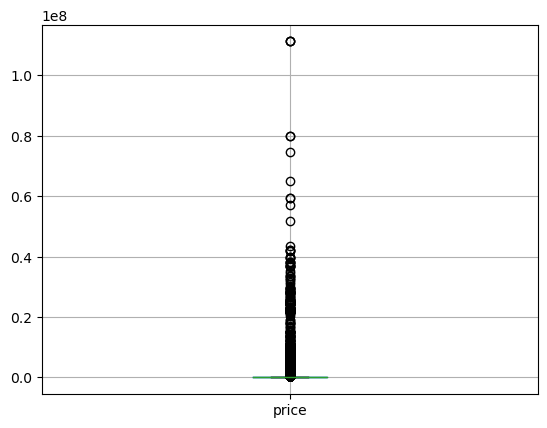

In [16]:
df_meli_2.boxplot(column="price")

In [17]:

# calculate IQR for each column
Q1 = df_meli_2.price.quantile(0.25)
Q3 = df_meli_2.price.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df_meli_2.price < lower_bound) | (df_meli_2.price > upper_bound))

# print the number of outliers
print(f"Number of outliers: {outliers.sum()}")
percentage_outliers= (outliers.sum() / len(df_meli_2.price)) *100 
print("Percentage of outliers in price column: " + str (percentage_outliers))


Number of outliers: 1850
Percentage of outliers in price column: 10.616929698708752


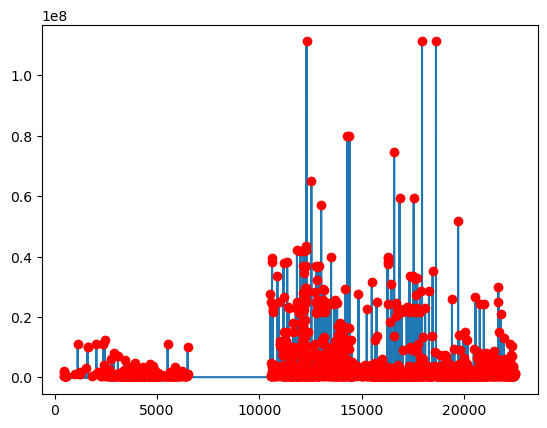

In [18]:
#Graph outliers 

df_meli_2_outliers =df_meli_2[outliers]


type(outliers)
outliers

plt.plot(df_meli_2.price)
plt.plot(df_meli_2_outliers.price, 'ro')

plt.show()

In [19]:
df_meli_2_outliers.shape


(1850, 37)

In [20]:
df_meli_2_outliers.columns

Index(['title', 'condition', 'category_id', 'domain_id', 'currency_id',
       'order_backend', 'price', 'tags', 'seller__id', 'seller__nickname',
       'seller__real_estate_agency', 'seller__tags',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_reputation__metrics__claims__period',
       'seller__seller_reputation__metrics__claims__value',
       'seller__seller_reputation__metrics__delayed_handling_time__period',
       'seller__seller_reputation__metrics__delayed_handling_time__rate',
       'seller__seller

In [21]:
df_meli_2_outliers.years_active.mean()

4.585405405405405

In [22]:
df_meli_2_outliers.location__state__name.value_counts()

Córdoba                   492
Neuquén                   347
Misiones                  199
Buenos Aires Interior     188
Río Negro                 136
Bs.As. Costa Atlántica    125
Uruguay                   117
Santa Fe                   79
Corrientes                 48
Entre Ríos                 46
Salta                      14
Santiago del Estero        11
Formosa                     9
San Luis                    7
Chaco                       6
Tucumán                     5
La Pampa                    3
Salto                       3
Rio Grande do Norte         3
Bs.As. G.B.A. Oeste         2
Alto Paraguay               2
San Juan                    2
Bs.As. G.B.A. Sur           1
Tacuarembó                  1
Itapúa                      1
Bs.As. G.B.A. Norte         1
Lavalleja                   1
Rio de Janeiro              1
Name: location__state__name, dtype: int64

In [23]:
df_meli_2_outliers[df_meli_2_outliers.location__state__name=="Rio Grande do Norte"]

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
11251,"Fabulosa Casa En Condominio Pipa Natureza, Pra...",new,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,44,350000.0,"['good_quality_picture', 'good_quality_thumbna...",814592144,GLOBALREALSTATE,...,PRAIA DA PIPA 100,TUxCQ1RJQmUwZDk3,Tibau do Sul,TUxCUFJJT0VkMmNj,Rio Grande do Norte,-6.226803,-35.045025,260,1,664092-MLA48771780183_012022
11337,"Casa A Estrenar Condominio Pipa Natureza, Prai...",new,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,30,345000.0,"['good_quality_picture', 'good_quality_thumbna...",814592144,GLOBALREALSTATE,...,PIPA NATUREZA 100,TUxCQ1RJQmUwZDk3,Tibau do Sul,TUxCUFJJT0VkMmNj,Rio Grande do Norte,-6.227443,-35.074130,260,1,816378-MLA49531626846_032022
11460,"Hotel Centro Praia Da Pipa, Rn Brasil",used,MLA79244,MLA-RETAIL_SPACE_FOR_SALE,USD,3,340000.0,['good_quality_picture'],814592144,GLOBALREALSTATE,...,AV BAHIA DOS GOLFINHOS 100,TUxCQ1RJQmUwZDk3,Tibau do Sul,TUxCUFJJT0VkMmNj,Rio Grande do Norte,-6.228176,-35.055055,260,1,765701-MLA48494806131_122021


In [24]:
#Propiedades a eliminar del dataframe (No son de argentina)
#list=["Tacuarembó", "Itapúa", "Lavalleja", "Rio de Janeiro", "Alto Parguay", "Salto", "Rio Grande do Norte", "Uruguay"]
list_outliers_index=df_meli_2[df_meli_2.index.isin(df_meli_2_outliers.index.to_list())].index.to_list()



df_meli_2.drop(index=list_outliers_index, inplace=True)
df_meli_2.head()

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
482,Casa 4 Ambientes,new,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,2,98000.0,['good_quality_thumbnail'],272797567,MA.EUGENIA.ASMAR.INMOBILIARIA,...,DE LAS Pleyades Y DE LAS Nereidas,TUxBQ1BJTmM0NmE5,Pinamar,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.116357,-56.871815,361,5,893051-MLA54154770493_032023
485,Venta Departamento De 1 Ambiente Con Balcon Sa...,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,5,58000.0,['good_quality_thumbnail'],142550392,TORMES PROPIEDADES,...,Valencia al 4100,TUxBQ01BUjU2MGMw,Mar del Plata,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.970890,-57.545558,360,9,827695-MLA54122015215_032023
487,Departamento En Venta 1 Ambiente Con Terraza P...,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,7,57900.0,['good_quality_thumbnail'],142550392,TORMES PROPIEDADES,...,Sargento Cabral 73,TUxBQ01BUjU2MGMw,Mar del Plata,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.980528,-57.544587,360,9,961934-MLA54122095347_032023
488,Venta Modernos Dúplex De 3 Y 4 Ambientes De Ca...,used,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,8,70000.0,['good_quality_thumbnail'],1196833678,MARIAALVAREZ INMOBILIARIA,...,"Calle 74 150, Mar del Tuyú, Provincia de Bueno...",TUxBQ01BUjYzZWE3,Mar del Tuyú,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-36.576385,-56.689554,363,0,718649-MLA54154169719_032023
489,"Oportunidad Venta , Edificio Con Todos Los Se...",used,MLA1473,MLA-APARTMENTS_FOR_RENT,USD,9,1200.0,[],618203895,WWW.INDIGOPROPIEDADES.COM,...,"Oportunidad venta , edificio con todos los se...",TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.936059,-54.937810,364,2,840072-MLA54201086841_032023


In [25]:
df_meli_2.shape

(15575, 37)

In [26]:
#Chequeamos
df_meli_2[df_meli_2.location__state__name=="Uruguay"]

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
489,"Oportunidad Venta , Edificio Con Todos Los Se...",used,MLA1473,MLA-APARTMENTS_FOR_RENT,USD,9,1200.0,[],618203895,WWW.INDIGOPROPIEDADES.COM,...,"Oportunidad venta , edificio con todos los se...",TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.936059,-54.937810,364,2,840072-MLA54201086841_032023
496,Venta: Casa Zona Colegios Ideal Inversion Punt...,new,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,16,319000.0,['good_quality_thumbnail'],466504638,SASA7020869,...,Venta: Casa Zona Colegios Ideal Inversion Punt...,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.923105,-54.938945,362,3,946499-MLA54164921838_032023
497,Apartamento Sobre La Brava - Punta Del Este Brava,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,17,170000.0,"['good_quality_thumbnail', 'moderation_penalty']",652785165,PROPIEDADES.COM.UY,...,Parada 11,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.939015,-54.948217,360,2,839449-MLA54126007340_032023
500,"Venta De Lote En Barra Verde, La Barra, Urugua...",used,MLA401687,MLA-INDIVIDUAL_LANDS_FOR_SALE,USD,20,194000.0,[],618203895,WWW.INDIGOPROPIEDADES.COM,...,Lauro Muller,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.902746,-54.949115,364,2,978242-MLA54169440901_032023
501,"Venta De Lote En Barra Verde, La Barra, Urugua...",used,MLA401687,MLA-INDIVIDUAL_LANDS_FOR_SALE,USD,21,195000.0,[],618203895,WWW.INDIGOPROPIEDADES.COM,...,Lauro Muller,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.902746,-54.949115,364,2,746478-MLA54169439624_032023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Torre Yoo Punta Del Este Alquiler Departament...,not_specified,MLA50279,MLA-APARTMENTS_FOR_VACATION_RENTAL,USD,11,2500.0,"['dragged_visits', 'free_relist', 'good_qualit...",276698275,PASCUALINIWALTER,...,Ave. Roossevelt 8,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.933434,-54.939344,264,5,752553-MLA48351664056_112021
4446,Chalet De 4 Dormitorios En Playa Mansa - Punta...,used,MLA50278,MLA-HOUSES_FOR_VACATION_RENTAL,USD,16,5000.0,[],1235451326,INMOBILIARIAPUNTA,...,Playa Mansa,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.918002,-54.976591,303,0,662210-MLA52643448434_112022
4477,Casa En Solanas Vacation Club,used,MLA50278,MLA-HOUSES_FOR_VACATION_RENTAL,USD,47,200.0,"['dragged_visits', 'free_relist', 'good_qualit...",64482832,PASINIAXEL,...,RUTA 12 20000,TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.936321,-54.937783,228,11,899458-MLA47815136223_102021
12847,Departamento En Venta Edificio Dolmenes - Mald...,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,40,108418.0,[],529012322,INMOBILIARIA NICOLAS.DE.MODENA,...,"Boulevard artigas, a pasos del centro de maldo...",TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-30.406818,-56.477594,287,3,630167-MLA53235499295_012023


In [27]:
df_meli_2_outliers[df_meli_2_outliers.location__state__name=="Córdoba"]

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
10528,Rooftop,new,MLA401806,MLA-DEVELOPMENT_APARTMENTS_FOR_SALE,ARS,21,27550000.0,"['good_quality_picture', 'good_quality_thumbna...",472823137,JB SRUR,...,Lima 1150,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.413329,-64.168128,18131,3,882430-MLA52250613767_112022
10621,Mapa 04 - 2 Dormitorios Y 2 Baños - Amplio Con...,new,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,ARS,14,38100000.0,['good_quality_thumbnail'],290278186,MP BIENESRAICES,...,Mapa 04 - 2 Dormitorios Y 2 Baños - Amplio CON...,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.413307,-64.166609,337,4,643447-MLA53669234103_022023
10622,"Departamento De Dos Dormitorios, Con Patio Exc...",new,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,ARS,15,39512568.0,['good_quality_thumbnail'],278712842,DUITPROPIEDADES,...,Lima 1367,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.412457,-64.165557,329,5,905178-MLA53533576141_012023
10623,Edificio - General Paz,new,MLA401806,MLA-DEVELOPMENT_APARTMENTS_FOR_SALE,ARS,16,24400000.0,"['good_quality_picture', 'good_quality_thumbna...",211257391,ROSSI BIENESRAICES,...,Lima 1367,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.412922,-64.166909,18141,5,756205-MLA52466547601_112022
10639,Nave Industrial- Ideal Fábricas/empresas,new,MLA6396,MLA-OTHER_PROPERTIES_FOR_SALE,USD,32,1600000.0,"['good_quality_thumbnail', 'good_quality_pictu...",1052757065,DIAPER INMOBILIARIA,...,AVENIDA JAPON 210,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.335751,-64.178047,270,1,867054-MLA52467353129_112022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442,Alquilo - Vendo Casa En Villa General Belgrano...,used,MLA50278,MLA-HOUSES_FOR_VACATION_RENTAL,ARS,35,1111111.0,"['good_quality_picture', 'good_quality_thumbna...",127258231,CASASGUADALUPE MAZUL,...,AV. SAN MARTÍN 1100,TVhYUGxvdHRpZXJUVXhCVUVOUFVtRmtaR0l3,Villa General Belgrano,TUxBUENPUmFkZGIw,Córdoba,-31.964050,-64.555036,106,10,941108-MLA53157409108_012023
18456,"Deposito Valparaiso 3500 M2 Oficina, Playa D M...",used,MLA1476,MLA-WAREHOUSES_FOR_RENT,ARS,49,1700000.0,['good_quality_thumbnail'],199875849,CERONI BIENESRAICES,...,"Apamea 863, Ciudad de Córdoba, Provincia de Có...",TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.463406,-64.187915,327,7,703803-MLA53499722110_012023
18458,Venta Casa Valparaíso 7 Dormitorios Gran Ubica...,used,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,1,350000.0,['good_quality_picture'],446228526,GLOBAL GROUP.PROPIEDADES,...,valparaiso 3200,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.449560,-64.186758,330,3,681284-MLA47297910456_082021
18464,Cañitas Oro Preventa Nueva Cordoba,new,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,ARS,7,35351563.0,['good_quality_thumbnail'],472823137,JB SRUR,...,Obispo Oro 454,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,-31.399254,-64.264384,266,3,969919-MLA50786029046_072022


In [28]:
#Podria filtrar por aquellos que tienen mas de 20 años activos ????

df_meli_2[df_meli_2.years_active > 15].index

Int64Index([  538,   592,   598,   604,   617,   624,   626,   630,   639,
              649,
            ...
            22307, 22313, 22314, 22315, 22334, 22384, 22420, 22482, 22490,
            22491],
           dtype='int64', length=1052)

In [29]:
#Propiedades a eliminar del dataframe (Mas de 15 años a la venta)

df_meli_2.drop(df_meli_2[df_meli_2.years_active > 15].index, inplace=True)
df_meli_2.head()

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
482,Casa 4 Ambientes,new,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,2,98000.0,['good_quality_thumbnail'],272797567,MA.EUGENIA.ASMAR.INMOBILIARIA,...,DE LAS Pleyades Y DE LAS Nereidas,TUxBQ1BJTmM0NmE5,Pinamar,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.116357,-56.871815,361,5,893051-MLA54154770493_032023
485,Venta Departamento De 1 Ambiente Con Balcon Sa...,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,5,58000.0,['good_quality_thumbnail'],142550392,TORMES PROPIEDADES,...,Valencia al 4100,TUxBQ01BUjU2MGMw,Mar del Plata,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.970890,-57.545558,360,9,827695-MLA54122015215_032023
487,Departamento En Venta 1 Ambiente Con Terraza P...,used,MLA401686,MLA-INDIVIDUAL_APARTMENTS_FOR_SALE,USD,7,57900.0,['good_quality_thumbnail'],142550392,TORMES PROPIEDADES,...,Sargento Cabral 73,TUxBQ01BUjU2MGMw,Mar del Plata,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.980528,-57.544587,360,9,961934-MLA54122095347_032023
488,Venta Modernos Dúplex De 3 Y 4 Ambientes De Ca...,used,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,8,70000.0,['good_quality_thumbnail'],1196833678,MARIAALVAREZ INMOBILIARIA,...,"Calle 74 150, Mar del Tuyú, Provincia de Bueno...",TUxBQ01BUjYzZWE3,Mar del Tuyú,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-36.576385,-56.689554,363,0,718649-MLA54154169719_032023
489,"Oportunidad Venta , Edificio Con Todos Los Se...",used,MLA1473,MLA-APARTMENTS_FOR_RENT,USD,9,1200.0,[],618203895,WWW.INDIGOPROPIEDADES.COM,...,"Oportunidad venta , edificio con todos los se...",TUxBQ01BTDMwMjk,Maldonado,TUxBUFVSVXllZDVl,Uruguay,-34.936059,-54.937810,364,2,840072-MLA54201086841_032023


In [30]:
df_meli_2.shape

(14523, 37)

In [31]:
df_meli_2_outliers[df_meli_2_outliers.index==481]

,title,condition,category_id,domain_id,currency_id,order_backend,price,tags,seller__id,seller__nickname,...,location__address_line,location__city__id,location__city__name,location__state__id,location__state__name,location__latitude,location__longitude,days_remaining,years_active,thumbnail_id
481,Casa 4 Ambientes C/pileta Climatizada Y Depend...,used,MLA401685,MLA-INDIVIDUAL_HOUSES_FOR_SALE,USD,1,350000.0,['good_quality_thumbnail'],272797567,MA.EUGENIA.ASMAR.INMOBILIARIA,...,Gallareta Y Ombu,TUxBQ0NBUjJmZDQx,Cariló,TUxBUENPU2ExMmFkMw,Bs.As. Costa Atlántica,-37.157505,-56.896406,358,5,732277-MLA54078441037_022023


In [32]:
len(df_meli_2_outliers)

1850

In [33]:
#df_meli_2[df_meli_2.index.isin(indexes)].index

In [34]:
#list_outliers_index=df_meli_2[df_meli_2.index.isin(df_meli_2_outliers.index.to_list())].index.to_list()
#print(list_outliers_index)

#len(list_outliers_index)

In [35]:
#df_meli_2.drop(index=df_meli_2[df_meli_2.index.isin(indexes)].index, inplace=True)

In [36]:
df_meli_2.columns

Index(['title', 'condition', 'category_id', 'domain_id', 'currency_id',
       'order_backend', 'price', 'tags', 'seller__id', 'seller__nickname',
       'seller__real_estate_agency', 'seller__tags',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_reputation__metrics__claims__period',
       'seller__seller_reputation__metrics__claims__value',
       'seller__seller_reputation__metrics__delayed_handling_time__period',
       'seller__seller_reputation__metrics__delayed_handling_time__rate',
       'seller__seller

<AxesSubplot:>

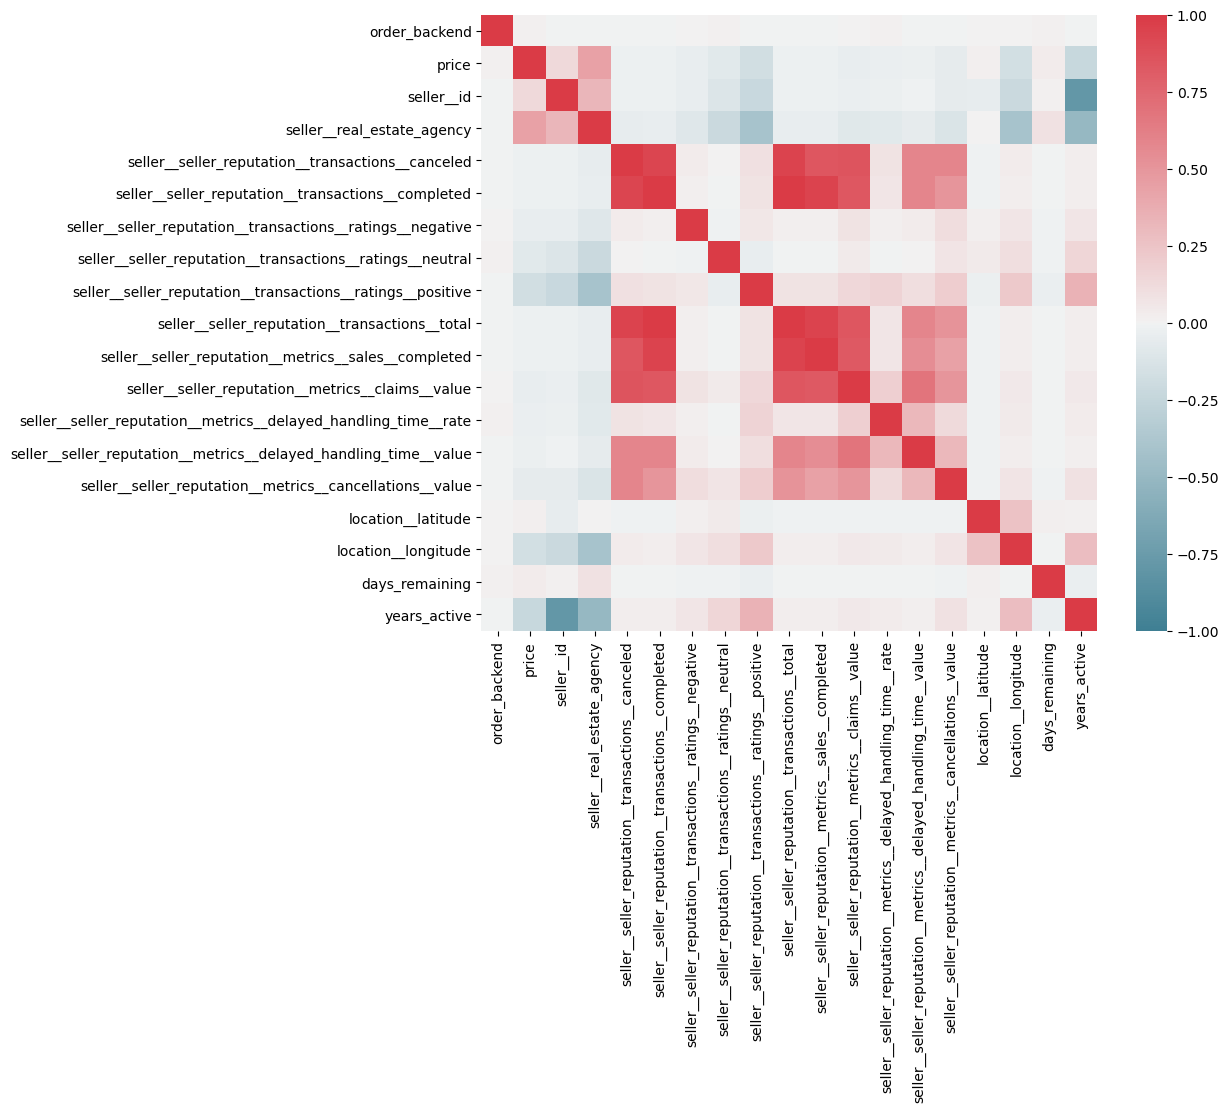

In [37]:
import seaborn as sns


f, ax = plt.subplots(figsize=(10, 8))
corr = df_meli_2.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

There are various scikit-learn models that can be used for predicting price targets, depending on the nature of the data and the specific requirements of the problem. Here are a few examples:

Linear Regression: This is a simple model that assumes a linear relationship between the input features and the target variable. It is a good starting point for regression problems and can be used for predicting continuous values, such as stock prices.

Decision Trees: This model uses a tree-like structure to make decisions based on the input features. It can be used for both regression and classification problems and is particularly useful when the relationship between the features and the target variable is non-linear.

Random Forest: This is an ensemble method that combines multiple decision trees to make more accurate predictions. It can be used for both regression and classification problems and is particularly useful when dealing with large datasets with many features.

Support Vector Machines (SVM): This is a powerful model that can be used for both regression and classification problems. It works by finding the best boundary that separates the data into different classes, or in the case of regression, predicts the target variable based on the input features.

Neural Networks: This is a deep learning model that can be used for a wide range of problems, including regression. It consists of multiple layers of interconnected nodes that can learn complex relationships between the input features and the target variable.

It's important to note that the choice of model will depend on the specific problem and data, and it's often a good idea to try multiple models and compare their performance before choosing the best one.

## PRICE es nuestra variable Target, es un problema de regresion y por lo tanto observamos los posibles modelos a aplicar para el pipeline correspondiente. 

In [38]:
df_meli_2.to_csv(f"./Data/DF_Meli_Inmuebles", index=False)

In [39]:
df_meli_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14523 entries, 482 to 22503
Data columns (total 37 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   title                                                              14523 non-null  object 
 1   condition                                                          14523 non-null  object 
 2   category_id                                                        14523 non-null  object 
 3   domain_id                                                          14523 non-null  object 
 4   currency_id                                                        14523 non-null  object 
 5   order_backend                                                      14523 non-null  int64  
 6   price                                                              14523 non-null  float64
 7   tags                

In [40]:
#Vamos a eliminar de training las siguientes columnas (category_id,condition,title,orderbackend, thumnbnail_id, seller id)

list_drop=["seller__nickname","seller__tags","seller__seller_reputation__metrics__sales__period", "seller__seller_reputation__metrics__claims__period", "seller__seller_reputation__metrics__delayed_handling_time__period", "seller__seller_reputation__metrics__cancellations__period"]
df_meli_2.drop(list_drop, axis=1,inplace=True)


In [41]:
df_meli_2.columns

Index(['title', 'condition', 'category_id', 'domain_id', 'currency_id',
       'order_backend', 'price', 'tags', 'seller__id',
       'seller__real_estate_agency',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_reputation__metrics__claims__value',
       'seller__seller_reputation__metrics__delayed_handling_time__rate',
       'seller__seller_reputation__metrics__delayed_handling_time__value',
       'seller__seller_reputation__metrics__cancellations__value',
       'location__address_line', 'location__city__id', 'location__city__name',
       'location__state__id', 'loc

In [42]:
df_meli_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14523 entries, 482 to 22503
Data columns (total 31 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   title                                                             14523 non-null  object 
 1   condition                                                         14523 non-null  object 
 2   category_id                                                       14523 non-null  object 
 3   domain_id                                                         14523 non-null  object 
 4   currency_id                                                       14523 non-null  object 
 5   order_backend                                                     14523 non-null  int64  
 6   price                                                             14523 non-null  float64
 7   tags                         

In [43]:
#Creamos dummies para las variables categoricas que usaremos
#Vamos a borrar todas estas columnas menos domain y currency, generan multicollinearidad, O Overfitting, hay casi la misma cantidad o mas columnas que filas. 
#"location__address_line", "location__city__id", "location__city__name", "location__state__id", "location__state__name","tags"
#(9730, 13352)(4793, 13352)(9730,)(4793,) VAlORES PREVIOS A BORRAR Y HACER MENOS DUMMIES
#(9730, 48)(4793, 48)(9730,)(4793,) NUEVOS VALORES, dejo de hacer overfitting. 48% Score. Vamos a probar agregando un par de columnas. "location__city__name","location__state__name"
#NO mejoro nada. Vamos a sacar de nuevo estas columnas. 
df_meli_2 = pd.get_dummies(df_meli_2, columns=["domain_id", "currency_id"])


In [44]:
df_meli_2.dropna(inplace=True)

In [45]:
df_meli_2.price.dtypes

dtype('float64')

Convertimos a INT porque al modelo de regresion lineal no le gustan las variables target continuas, lease (FLOAT)

In [46]:
df_meli_2["price"]= df_meli_2["price"].astype(int)

In [47]:
df_meli_2["price"].dtypes

dtype('int64')

PREMODEL

In [48]:
# Separamos las variables independientes de la target
# Saque seller id "seller__id" a ver si mejora
X=df_meli_2.drop(columns=["price","category_id","condition","title","order_backend", "thumbnail_id","location__address_line", "location__city__id", "location__state__id", "location__city__name","location__state__name","tags"])
y=df_meli_2['price'].astype(int)

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(9730, 50)

(4793, 50)

(9730,)

(4793,)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14523 entries, 482 to 22503
Data columns (total 50 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   seller__id                                                        14523 non-null  int64  
 1   seller__real_estate_agency                                        14523 non-null  bool   
 2   seller__seller_reputation__transactions__canceled                 14523 non-null  int64  
 3   seller__seller_reputation__transactions__completed                14523 non-null  int64  
 4   seller__seller_reputation__transactions__ratings__negative        14523 non-null  float64
 5   seller__seller_reputation__transactions__ratings__neutral         14523 non-null  float64
 6   seller__seller_reputation__transactions__ratings__positive        14523 non-null  float64
 7   seller__seller_reputation__tr

In [50]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [51]:
selector=FeatureSelection(selected_features=X.columns.values)

In [52]:
steps = [('feature_engineering',selector),
         ('preprocesamiento', MinMaxScaler()), 
         ('modelo', LinearRegression())]

pipe=Pipeline(steps)

In [53]:
param_grid = [{'feature_engineering':[selector, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), None]},
               {'modelo': [LinearRegression()],
               "modelo__fit_intercept": [True, False]},
               {"modelo": [XGBRegressor()],
                "modelo__n_estimators": [100, 500, 1000, 2000],
                'modelo__max_depth': [3, 6, 9, 12],
                'modelo__learning_rate': [0.01, 0.03, 0.05, 0.1]
               },
               {"modelo": [RandomForestRegressor()],
                "modelo__n_jobs": [-1],
                "modelo__n_estimators": [100, 150, 200, 350, 400],
                "modelo__bootstrap": [True, False],
                "modelo__max_depth": [10, 20, 30, None],
                "modelo__max_features": ['auto', 'sqrt'],
                'modelo__min_samples_leaf': [1, 2, 4, 6, 8],
                'modelo__min_samples_split': [2, 5, 10, 20, 40]},
               {"modelo": [DecisionTreeRegressor()],
                "modelo__splitter":["best","random"],
                "modelo__max_depth" : [1,3],
                "modelo__min_samples_leaf":[1,2,3],
                "modelo__min_weight_fraction_leaf":[0.1,0.2,0.3],
                "modelo__max_features":["auto",None],
                "modelo__max_leaf_nodes":[None,10,20]}
]

In [54]:
pipe.get_params()

{'memory': None,
 'steps': [('feature_engineering',
   FeatureSelection(selected_features=array(['seller__id', 'seller__real_estate_agency',
          'seller__seller_reputation__transactions__canceled',
          'seller__seller_reputation__transactions__completed',
          'seller__seller_reputation__transactions__ratings__negative',
          'seller__seller_reputation__transactions__ratings__neutral',
          'seller__seller_reputation__transactions...
          'domain_id_MLA-OTHER_PROPERTIES_FOR_RENT',
          'domain_id_MLA-OTHER_PROPERTIES_FOR_SALE',
          'domain_id_MLA-RETAIL_SPACE_FOR_RENT',
          'domain_id_MLA-RETAIL_SPACE_FOR_SALE',
          'domain_id_MLA-TIMESHARE_PROPERTY_FOR_SALE',
          'domain_id_MLA-TIMESHARE_PROPERTY_FOR_VACATION_RENTAL',
          'domain_id_MLA-WAREHOUSES_FOR_RENT',
          'domain_id_MLA-WAREHOUSES_FOR_SALE', 'currency_id_ARS',
          'currency_id_USD'], dtype=object))),
  ('preprocesamiento', MinMaxScaler()),
  ('modelo

In [55]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

GRID SEARCH tardo +32hs (Crasheo la pc )

In [56]:
grid = RandomizedSearchCV(pipe, param_grid, cv=kfold, n_iter=25, n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureSelection(selected_features=array(['seller__id', 'seller__real_estate_agency',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__r...
                                         'modelo__min_samples_split': [2, 5, 10,
                                                                       20, 40],
                                         'modelo__n_estimators': [100, 150, 200,
                                                                  350, 400],
                                         'modelo__n_jobs': [-1]},
                                        {'modelo': [DecisionTreeRegressor()],
                                         'modelo__max_depth': [1, 3],
                   

In [57]:
grid.best_score_

0.49226841098781327

In [58]:
print(grid.best_params_)

{'modelo__n_jobs': -1, 'modelo__n_estimators': 350, 'modelo__min_samples_split': 20, 'modelo__min_samples_leaf': 1, 'modelo__max_features': 'auto', 'modelo__max_depth': None, 'modelo__bootstrap': True, 'modelo': RandomForestRegressor(min_samples_split=20, n_estimators=350, n_jobs=-1)}


In [59]:
grid.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureSelection(selected_features=array(['seller__id', 'seller__real_estate_agency',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       '...
       'domain_id_MLA-RETAIL_SPACE_FOR_SALE',
       'domain_id_MLA-TIMESHARE_PROPERTY_FOR_SALE',
       'domain_id_MLA-TIMESHARE_PROPERTY_FOR_VACATION_RENTAL',
       'domain_id_MLA-WAREHOUSES_FOR_RENT',
       'domain_id_MLA-WAREHOUSES_FOR_SALE', 'currency_id_ARS',
       'currency_id_USD'], dtype=object))),
                ('preprocesamiento', MinMaxScaler()),
                ('modelo',
                 RandomForestRegressor(min_samples_split=20, n_estimators=350,
                                       n_jobs=-1))])

In [60]:
y_pred=grid.best_estimator_.predict(X_test)

In [61]:
score=grid.best_estimator_.score(X_test,y_test)
score

0.49366311328166845

VAMOS A REMOVER LOS OUTLIERS A VER SI CAMBIA.

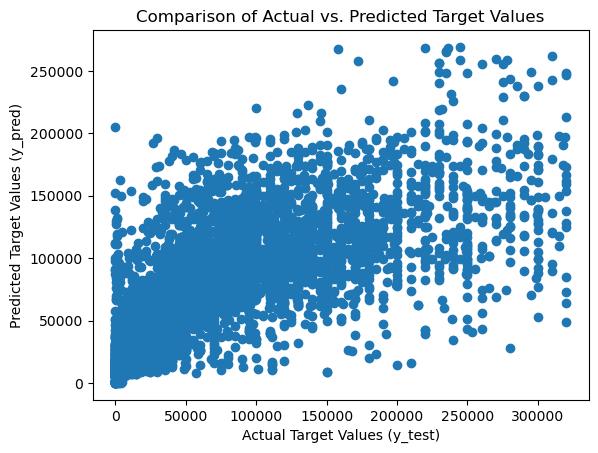

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Target Values (y_test)")
plt.ylabel("Predicted Target Values (y_pred)")
plt.title("Comparison of Actual vs. Predicted Target Values")
plt.show()